### Импортируем библиотеки

In [1]:
from sklearn.cluster import KMeans

In [2]:
from sklearn.datasets import make_blobs

In [3]:
import pandas as pd

In [4]:
import math

In [5]:
from scipy. stats import lognorm

In [6]:
from pathlib import Path

In [7]:
import matplotlib.pyplot as plt

In [8]:
import matplotlib

In [9]:
import pandas

In [10]:
import numpy as np

In [11]:
import numpy

In [12]:
import csv

In [13]:
import datetime

In [14]:
import seaborn as sns

### Присваиваем для дальнейшей работы

### Кластерный анализ

будет проводить на основе атрибута "payment_type" это поможет выяснить каких методов оплаты больше чтобы оптимизировать их способы, а также нам может помочь в анализе "RatecodeID" чтобы выяснить какие тарифы востребованы и их можно увеличить а какие наоброт сократить, мы можем сразу исключить колонку "mta_tax" так как сумма налога фиксирована и нам это не поможет в оптимизации исключаем также "improvement_surcharge" у компании она фиксирована как и налог "store_and_fwd_flag" также можно исключить ведь это просто перессылка

### Сделаем вывод таблиц где вы можете увидеть все столбцы описаные ранее

In [13]:
pd.read_csv('2020_Yellow_Taxi_Trip_Data_20240320.csv', low_memory=False)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.20,1.0,N,238,239,1.0,6.00,3.0,0.5,1.47,0.00,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.20,1.0,N,239,238,1.0,7.00,3.0,0.5,1.50,0.00,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.60,1.0,N,238,238,1.0,6.00,3.0,0.5,1.00,0.00,0.3,10.80,2.5
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.80,1.0,N,238,151,1.0,5.50,0.5,0.5,1.36,0.00,0.3,8.16,0.0
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.00,1.0,N,193,193,2.0,3.50,0.5,0.5,0.00,0.00,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24648494,NaN,12/31/2020 11:44:35 PM,01/01/2021 12:01:22 AM,NaN,9.22,NaN,NaN,143,20,NaN,32.49,0.0,0.5,8.16,0.00,0.3,43.95,2.5
24648495,NaN,12/31/2020 11:41:36 PM,12/31/2020 11:50:32 PM,NaN,4.79,NaN,NaN,4,262,NaN,13.22,0.0,0.5,3.65,0.00,0.3,20.17,2.5
24648496,NaN,12/31/2020 11:01:17 PM,12/31/2020 11:40:37 PM,NaN,28.00,NaN,NaN,210,78,NaN,69.31,0.0,0.5,2.75,6.12,0.3,78.98,0.0
24648497,NaN,12/31/2020 11:31:29 PM,12/31/2020 11:44:22 PM,NaN,7.08,NaN,NaN,148,129,NaN,35.95,0.0,0.5,2.75,0.00,0.3,39.50,0.0


In [42]:
pd.read_csv('2021_Yellow_Taxi_Trip_Data_20240320.csv', low_memory=False)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2021 12:30:10 AM,01/01/2021 12:36:12 AM,1.0,2.10,1.0,N,142,43,2.0,8.00,3.0,0.5,0.00,0.0,0.3,11.80,2.5
1,1.0,01/01/2021 12:51:20 AM,01/01/2021 12:52:19 AM,1.0,0.20,1.0,N,238,151,2.0,3.00,0.5,0.5,0.00,0.0,0.3,4.30,0.0
2,1.0,01/01/2021 12:43:30 AM,01/01/2021 01:11:06 AM,1.0,14.70,1.0,N,132,165,1.0,42.00,0.5,0.5,8.65,0.0,0.3,51.95,0.0
3,1.0,01/01/2021 12:15:48 AM,01/01/2021 12:31:01 AM,0.0,10.60,1.0,N,138,132,1.0,29.00,0.5,0.5,6.05,0.0,0.3,36.35,0.0
4,2.0,01/01/2021 12:31:49 AM,01/01/2021 12:48:21 AM,1.0,4.94,1.0,N,68,33,1.0,16.50,0.5,0.5,4.06,0.0,0.3,24.36,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30904067,2.0,12/31/2021 11:18:02 PM,12/31/2021 11:32:19 PM,NaN,3.99,NaN,NaN,145,107,0.0,17.42,0.0,0.5,5.80,0.0,0.3,26.52,NaN
30904068,2.0,12/31/2021 11:46:00 PM,01/01/2022 12:07:00 AM,NaN,5.96,NaN,NaN,236,158,0.0,23.05,0.0,0.5,2.85,0.0,0.3,29.20,NaN
30904069,2.0,12/31/2021 11:46:00 PM,01/01/2022 12:04:00 AM,NaN,4.99,NaN,NaN,48,13,0.0,20.97,0.0,0.5,5.23,0.0,0.3,29.50,NaN
30904070,2.0,12/31/2021 11:53:00 PM,01/01/2022 12:02:00 AM,NaN,1.36,NaN,NaN,75,75,0.0,13.20,0.0,0.5,2.00,0.0,0.3,16.00,NaN


## Кластеризация набора данных

### Для кластеризации я возму группы 
1. payment_type - тип оплаты
2. RatecodeID - тариф поездки 
3. total_amount - Общая сумма поездки
4. tip amoun - Чаевые

#### Я взял эти 4 группы для того чтобы выяснить в каком тарифе больше оставляют чаевых как это влияет на общую сумму поездки а также каким образом проходит оплата 
1. Кластер "Тип оплаты":
- В этом кластере объединены поездки, которые имеют одинаковый тип оплаты.
- Характеристика: клиенты предпочитают определенный способ оплаты (например, наличные или кредитная карта).
 
2. Кластер "Тариф поездки":
- Этот кластер объединяет поездки с одинаковым тарифом.
- Характеристика: клиенты, выбирающие определенный тариф, могут сделать поездки с похожими характеристиками (например, длительностью или дистанцией).

3. Кластер "Общая сумма поездки":
- В данном кластере объединены поездки с схожей общей суммой.
- Характеристика: клиенты, совершающие поездки с похожей стоимостью, могут иметь схожие паттерны потребления.

4. Кластер "Чаевые":
- Этот кластер объединяет поездки в зависимости от суммы чаевых, оставленных водителю.
- Характеристика: клиенты, оставляющие схожие суммы чаевых, могут иметь схожее поведение или предпочтения.

### Присваиваем значения для кластера

In [45]:
df = pd.read_csv('2020_Yellow_Taxi_Trip_Data_20240320.csv', low_memory=False, decimal=",")

In [16]:
parse_dates = ["tpep_pickup_datetime", "tpep_dropoff_datetime"]
dtype = {
    "VendorID": "int",
    "tpep_pickup_datetime": "datetime64[ns]",
    "tpep_dropoff_datetime": "datetime64[ns]",
    "passenger_count": "int",
    "trip_distance": "float",
    "fare_amount": "float",
    "extra": "float",
    "mta_tax": "float",
    "tip_amount": "float",
    "tolls_amount": "float",
    "improvement_surcharge": "float",
    "total_amount": "float",
    "payment_type": "int",
    "congestion_surcharge": "float"
}

### Меняем тип данных для кластера

### Рисуем кластер из полученых данных

C:\Users\locadm\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


MemoryError: Unable to allocate 2.16 PiB for an array with shape (303774239152251,) and data type float64

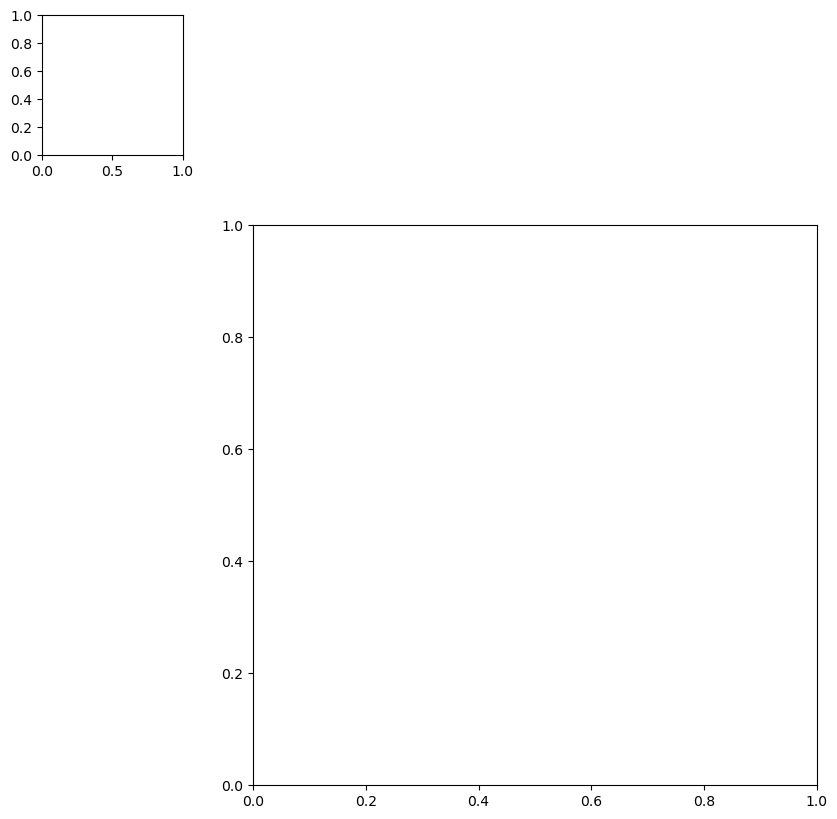

In [49]:
# Берем 10% информации из датафрейма случайным образом
cluster = df[['payment_type', 'RatecodeID', 'total_amount', 'tip_amount']]

# Рисуем кластерную карту
sns.clustermap(cluster, metric='correlation', annot=True, chunksize=1000)
plt.show()

### Разведочный анализ

Рассмотрев Кластер на 2020 2021можно наблюдать изменения что расстояние поездок стало куда больше ещё, что оплат под значением 2 стало куда больше, характерно изменения и в цене поездки она стала больше, также хорошая тенденция в чаевых люди их стали оставлять куда чаще под итожив можно сказать что в моей области которую я выбрал происходит только рост всех позиций

### Прогнозирование

Сделав анализ данных за 2020 и 2021 увидев рост по всем столбцам я могу сказать с уверенностью что рост всех позиций только будет расти возможно кроме чаевых они могут увеличиться не на много

### Создание модели для API

Создаём модель для 4 колонок для дальнейшего анализа 

In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
data = pd.read_csv('2020_Yellow_Taxi_Trip_Data_20240320.csv', low_memory=False, decimal=",")
df = pd.DataFrame(data)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df[['payment_type', 'RatecodeID', 'total_amount']] = imputer.fit_transform(df[['payment_type', 'RatecodeID', 'total_amount']])
df['tip_amount'] = df['tip_amount'].fillna(0)

label_encoder = LabelEncoder()
df['payment_type'] = label_encoder.fit_transform(df['payment_type'])

X = df[['payment_type', 'RatecodeID', 'total_amount']]
y = df['tip_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print("Точность модели:", accuracy)

Точность модели: 0.7726746881568083


### Создание API

In [27]:
from flask import Flask, request, jsonify
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    df = pd.DataFrame(data)
    
    imputer = SimpleImputer(strategy='mean')
    df[['payment_type', 'RatecodeID', 'total_amount']] = imputer.fit_transform(df[['payment_type', 'RatecodeID', 'total_amount']])
    
    df['tip_amount'] = df['tip_amount'].fillna(0)
    
    label_encoder = LabelEncoder()
    df['payment_type'] = label_encoder.fit_transform(df['payment_type'])

    X = df[['payment_type', 'RatecodeID', 'total_amount']]
    y_pred = model.predict(X)

    return jsonify({'tip_amount_prediction': list(y_pred)})

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\locadm\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### Документация по запуску

1. Установите python
2. Установите все библиотеки которые я использую в своём проекте
3. Скачайте файлы csv для работы
4. Скопируйте себе код и запустите